# Supplemental Figure 2

- Panel A: Plate map for Plate A
- Panel B: Plate map for Plate B
- Panel C: Plate map for Plate C

## Import libraries

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(platetools))
suppressPackageStartupMessages(library(patchwork))

Warning message:
“package ‘dplyr’ was built under R version 4.2.3”


Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘platetools’ was built under R version 4.2.3”
Warning message:
“package ‘patchwork’ was built under R version 4.2.3”


In [2]:
figure_dir <- "../figures/supplementary"
output_supp_figure <- file.path(figure_dir, "supp_figure_2_nf1_genotype_platemaps.png")

# Path to platemaps
platemap_dir <- file.path(
    "/media/18tbdrive/1.Github_Repositories/nf1_schwann_cell_painting_data/0.download_data/metadata/"
)

## Load in Plate A and B plate map

Note: Plate A references Plate 3 and Plate B references Plate 3 prime

In [3]:
# Load data
plate_A_B_file <- file.path(platemap_dir, "platemap_NF1_plate3.csv")

plate_A_B_df <- readr::read_csv(plate_A_B_file)

# Remove rows where genotype is "HET"
plate_A_B_df <- plate_A_B_df %>%
  filter(!grepl("HET", genotype)) %>%
  mutate(
    cell_line_code = case_when(
      genotype == "Null" ~ "Null C04",
      genotype == "WT" ~ "WT A3",
      TRUE ~ genotype
    )
  )

dim(plate_A_B_df)
head(plate_A_B_df)

Rows: 72 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): WellRow, well_position, gene_name, genotype
dbl (2): WellCol, seed_density

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 48  7

WellRow,WellCol,well_position,gene_name,genotype,seed_density,cell_line_code
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
B,1,B1,NF1,WT,500,WT A3
C,1,C1,NF1,WT,500,WT A3
D,1,D1,NF1,WT,500,WT A3
E,1,E1,NF1,WT,500,WT A3
F,1,F1,NF1,WT,500,WT A3
G,1,G1,NF1,WT,500,WT A3


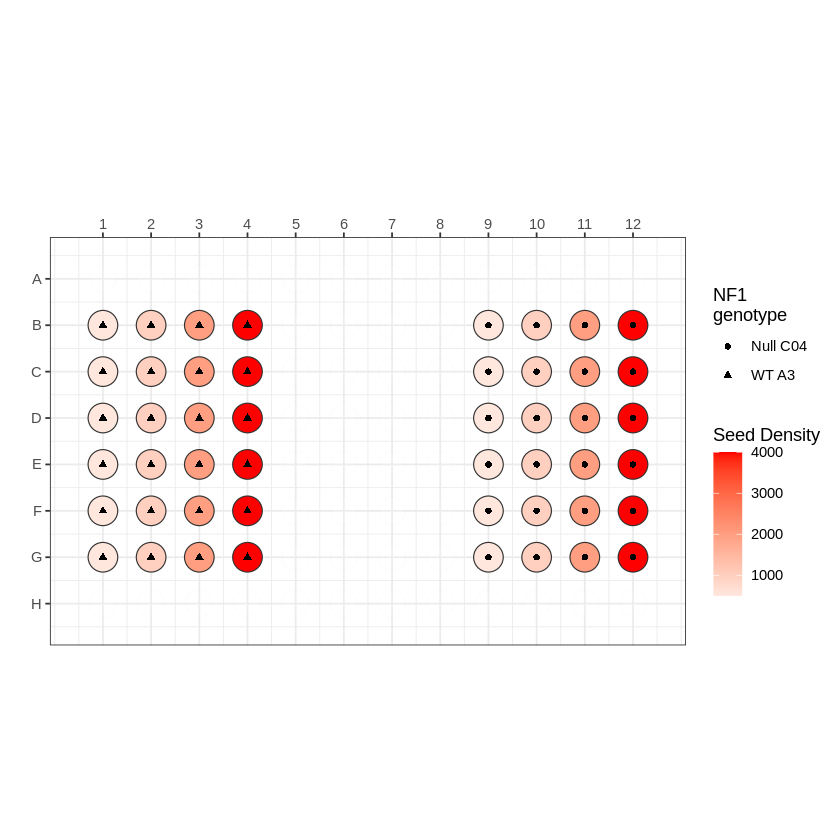

In [4]:
platemap_A_B <-
        platetools::raw_map(
            data = as.numeric(plate_A_B_df$seed_density),
            well = plate_A_B_df$well_position,
            plate = 96,
            size = 8
        ) +
        theme(plot.title = element_text(size = 10, face = "bold")) +
        ggplot2::geom_point(aes(shape = plate_A_B_df$cell_line_code)) +
        ggplot2::scale_shape_discrete(name = "NF1\ngenotype") +
        ggplot2::scale_fill_gradient2(
        name = "Seed Density",
        low = "white",
        high = "red",
        ) 

platemap_A_B

## Load in Plate C plate map

Note: Plate C references Plate 5

In [5]:
# Load data
plate_C_file <- file.path(platemap_dir, "platemap_NF1_plate5.csv")

plate_C_df <- readr::read_csv(plate_C_file)

# Remove rows where genotype is "HET"
plate_C_df <- plate_C_df %>%
  filter(!grepl("HET", genotype)) %>%
  mutate(
    cell_line_code = case_when(
      genotype == "Null" ~ "Null C04",
      genotype == "WT" ~ "WT A3",
      TRUE ~ genotype
    )
  )

dim(plate_C_df)
head(plate_C_df)

Rows: 72 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): WellRow, well_position, gene_name, genotype
dbl (1): WellCol

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 48  6

WellRow,WellCol,well_position,gene_name,genotype,cell_line_code
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
B,1,B1,NF1,WT,WT A3
C,1,C1,NF1,WT,WT A3
D,1,D1,NF1,WT,WT A3
E,1,E1,NF1,WT,WT A3
F,1,F1,NF1,WT,WT A3
G,1,G1,NF1,WT,WT A3


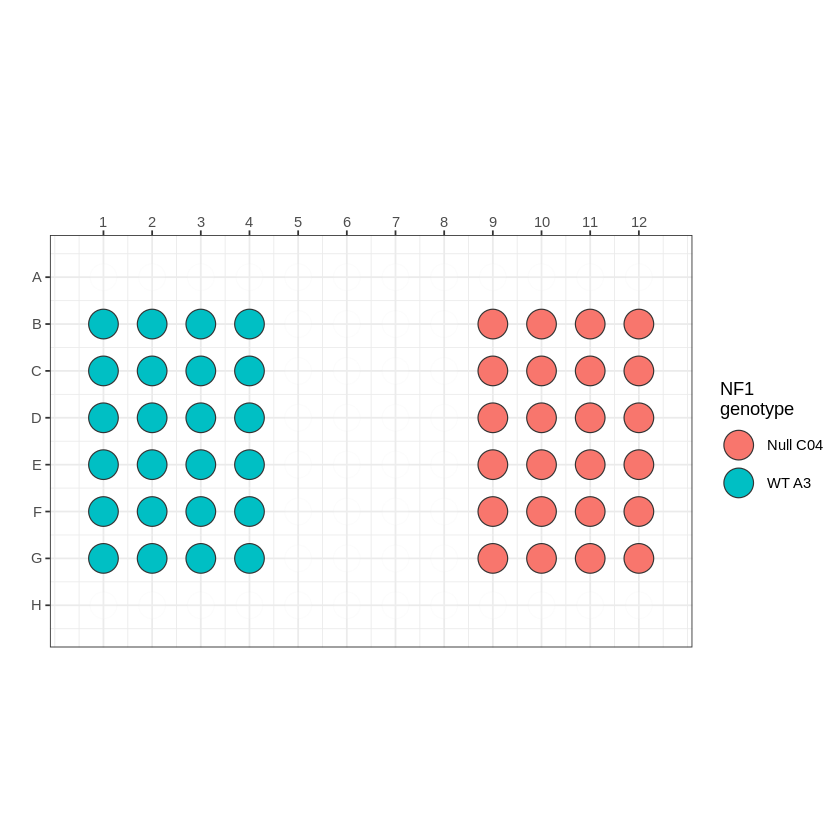

In [6]:
platemap_C <-
        platetools::raw_map(
            data = plate_C_df$cell_line_code,
            well = plate_C_df$well_position,
            plate = 96,
            size = 8
        ) +
        theme(plot.title = element_text(size = 10, face = "bold")) +
        ggplot2::scale_fill_discrete(name = "NF1\ngenotype")  

platemap_C

## Generate supplemental figure

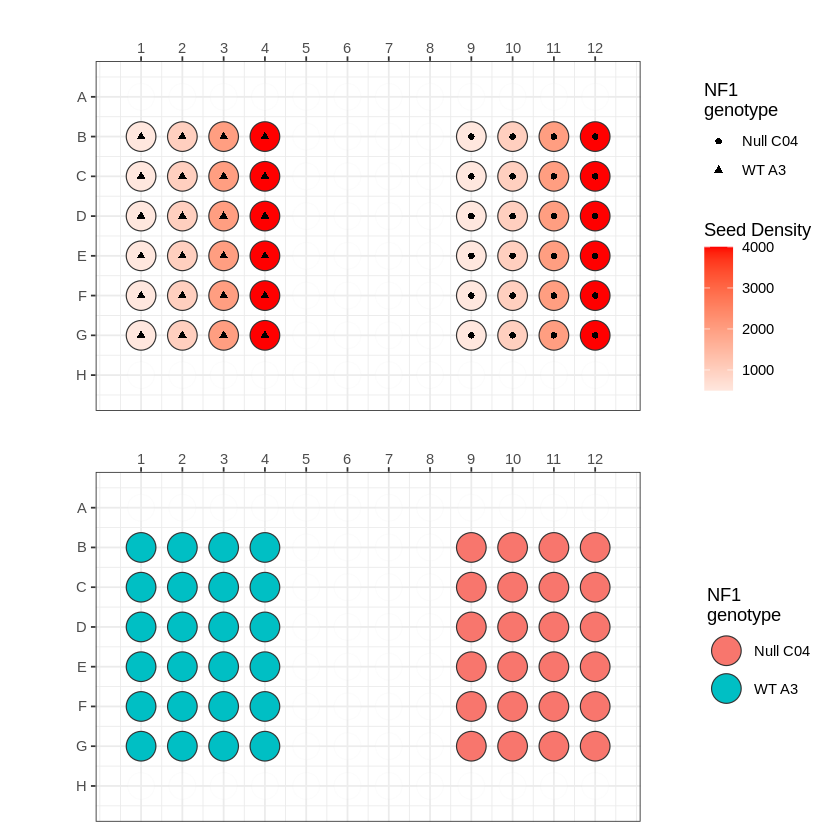

In [7]:
align_plot <- (
    platemap_A_B /
    platemap_C 
) + plot_layout(heights= c(2,2))

align_plot

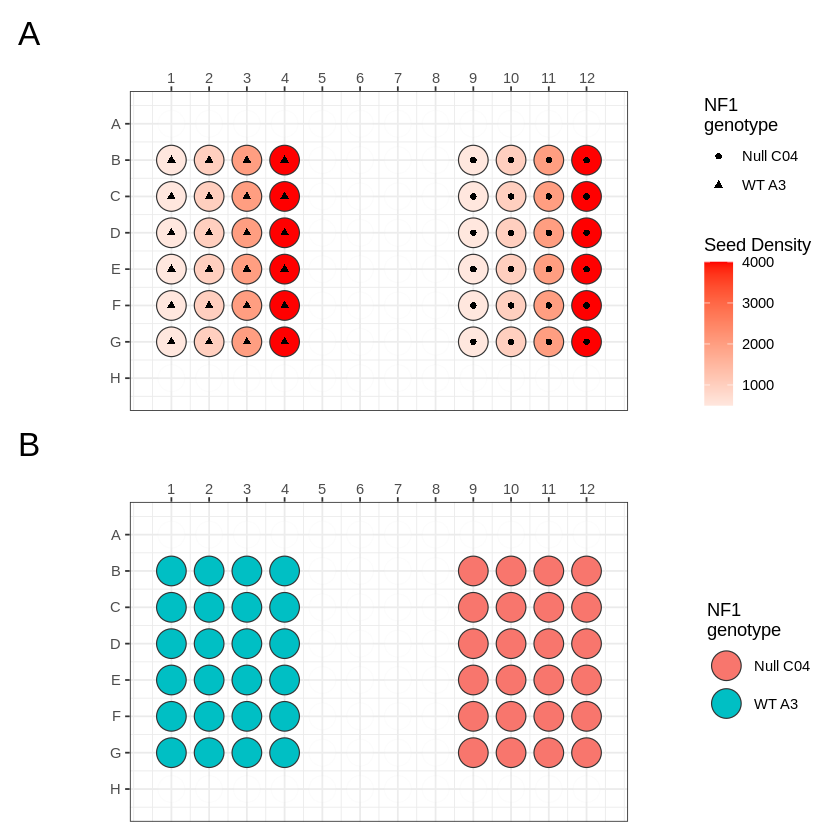

In [8]:
supp_fig_gg <- (
  align_plot
) + plot_annotation(tag_levels = "A") & theme(plot.tag = element_text(size = 20))

# Save or display the plot
ggsave(output_supp_figure, plot = supp_fig_gg, dpi = 500, height = 7.75, width = 7)

supp_fig_gg